In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
logs1 = """
2020-08-01 12:29:52,481 INFO     cache hit: 100
2020-08-01 12:29:54,765 INFO     on player 1000
2020-08-01 12:29:55,166 INFO     cache hit: 200
2020-08-01 12:30:05,838 INFO     cache hit: 300
2020-08-01 12:30:09,157 INFO     on player 2000
2020-08-01 12:30:15,365 INFO     cache hit: 400
2020-08-01 12:30:33,277 INFO     on player 3000
2020-08-01 12:30:35,041 INFO     cache hit: 500
2020-08-01 12:30:50,280 INFO     cache hit: 600
2020-08-01 12:30:59,802 INFO     on player 4000
2020-08-01 12:31:03,364 INFO     cache hit: 700
2020-08-01 12:31:18,192 INFO     cache hit: 800
2020-08-01 12:31:26,895 INFO     on player 5000
2020-08-01 12:31:32,822 INFO     cache hit: 900
2020-08-01 12:31:48,404 INFO     cache hit: 1000
2020-08-01 12:31:59,611 INFO     on player 6000
2020-08-01 12:32:03,941 INFO     cache hit: 1100
2020-08-01 12:32:20,354 INFO     cache hit: 1200
2020-08-01 12:32:50,506 INFO     on player 7000
2020-08-01 12:32:58,009 INFO     cache hit: 1300
2020-08-01 12:33:36,670 INFO     cache hit: 1400
2020-08-01 12:34:00,359 INFO     cache hit: 1500
2020-08-01 12:34:01,578 INFO     on player 8000
2020-08-01 12:34:12,467 INFO     cache hit: 1600
2020-08-01 12:34:27,981 INFO     cache hit: 1700
2020-08-01 12:34:40,542 INFO     on player 9000
2020-08-01 12:34:41,307 INFO     cache hit: 1800
2020-08-01 12:34:55,227 INFO     cache hit: 1900
2020-08-01 12:35:11,049 INFO     cache hit: 2000
2020-08-01 12:35:27,159 INFO     cache hit: 2100
2020-08-01 12:35:27,506 INFO     on player 10000
2020-08-01 12:35:52,645 INFO     cache hit: 2200
2020-08-01 12:36:24,860 INFO     cache hit: 2300
2020-08-01 12:36:36,200 INFO     on player 11000
2020-08-01 12:36:57,875 INFO     cache hit: 2400
2020-08-01 12:37:18,935 INFO     cache hit: 2500
2020-08-01 12:37:29,425 INFO     cache hit: 2600
2020-08-01 12:37:41,311 INFO     on player 12000
2020-08-01 12:37:45,255 INFO     cache hit: 2700
2020-08-01 12:38:00,267 INFO     cache hit: 2800
2020-08-01 12:38:34,770 INFO     cache hit: 2900
2020-08-01 12:38:40,697 INFO     on player 13000
2020-08-01 12:38:54,822 INFO     cache hit: 3000
2020-08-01 12:39:17,405 INFO     cache hit: 3100
2020-08-01 12:39:39,175 INFO     on player 14000
2020-08-01 12:39:52,016 INFO     cache hit: 3200
2020-08-01 12:40:29,898 INFO     cache hit: 3300
2020-08-01 12:40:49,701 INFO     on player 15000
2020-08-01 12:40:50,365 INFO     cache hit: 3400
2020-08-01 12:41:13,844 INFO     cache hit: 3500
2020-08-01 12:41:28,474 INFO     cache hit: 3600
2020-08-01 12:41:38,838 INFO     cache hit: 3700
2020-08-01 12:41:52,978 INFO     cache hit: 3800
2020-08-01 12:41:57,459 INFO     on player 16000
2020-08-01 12:42:13,849 INFO     cache hit: 3900
2020-08-01 12:43:05,070 INFO     cache hit: 4000
2020-08-01 12:43:32,720 INFO     on player 17000
2020-08-01 12:43:39,238 INFO     cache hit: 4100
2020-08-01 12:44:05,558 INFO     cache hit: 4200
2020-08-01 12:44:26,832 INFO     cache hit: 4300
2020-08-01 12:44:45,606 INFO     cache hit: 4400
2020-08-01 12:44:47,877 INFO     on player 18000
2020-08-01 12:45:04,039 INFO     cache hit: 4500
2020-08-01 12:45:22,430 INFO     cache hit: 4600
2020-08-01 12:45:36,326 INFO     cache hit: 4700
2020-08-01 12:46:06,404 INFO     on player 19000
2020-08-01 12:46:10,139 INFO     cache hit: 4800
2020-08-01 12:46:35,009 INFO     cache hit: 4900
2020-08-01 12:46:52,277 INFO     cache hit: 5000
2020-08-01 12:47:08,228 INFO     cache hit: 5100
2020-08-01 12:47:23,258 INFO     cache hit: 5200
2020-08-01 12:47:26,976 INFO     on player 20000
2020-08-01 12:47:32,340 INFO     cache hit: 5300
2020-08-01 12:47:53,563 INFO     cache hit: 5400
2020-08-01 12:48:34,567 INFO     cache hit: 5500
2020-08-01 12:49:19,915 INFO     on player 21000
2020-08-01 12:49:31,010 INFO     cache hit: 5600
2020-08-01 12:50:00,126 INFO     cache hit: 5700
2020-08-01 12:50:16,134 INFO     cache hit: 5800
2020-08-01 12:50:35,028 INFO     cache hit: 5900
2020-08-01 12:50:55,629 INFO     cache hit: 6000
2020-08-01 12:51:02,096 INFO     on player 22000
2020-08-01 12:51:18,900 INFO     cache hit: 6100
2020-08-01 12:51:42,813 INFO     cache hit: 6200
2020-08-01 12:52:10,982 INFO     cache hit: 6300
2020-08-01 12:52:29,786 INFO     on player 23000
2020-08-01 12:52:32,257 INFO     cache hit: 6400
2020-08-01 12:52:44,094 INFO     cache hit: 6500
2020-08-01 12:53:04,804 INFO     cache hit: 6600
2020-08-01 12:53:24,978 INFO     cache hit: 6700
2020-08-01 12:53:44,288 INFO     cache hit: 6800
2020-08-01 12:54:01,940 INFO     cache hit: 6900
2020-08-01 12:54:04,302 INFO     on player 24000
2020-08-01 12:54:19,970 INFO     cache hit: 7000
2020-08-01 12:55:25,128 INFO     cache hit: 7100
2020-08-01 12:56:15,769 INFO     on player 25000
2020-08-01 12:56:27,519 INFO     cache hit: 7200
2020-08-01 12:56:57,240 INFO     cache hit: 7300
2020-08-01 12:57:31,958 INFO     cache hit: 7400
2020-08-01 12:57:48,622 INFO     cache hit: 7500
2020-08-01 12:58:09,542 INFO     on player 26000
2020-08-01 12:58:13,823 INFO     cache hit: 7600
2020-08-01 12:58:46,328 INFO     cache hit: 7700
2020-08-01 12:59:07,960 INFO     cache hit: 7800
2020-08-01 12:59:20,311 INFO     cache hit: 7900
2020-08-01 12:59:32,653 INFO     cache hit: 8000
2020-08-01 12:59:57,282 INFO     cache hit: 8100
2020-08-01 13:00:13,078 INFO     cache hit: 8200
2020-08-01 13:00:15,985 INFO     on player 27000
2020-08-01 13:00:33,756 INFO     cache hit: 8300
2020-08-01 13:01:32,136 INFO     cache hit: 8400
2020-08-01 13:02:00,023 INFO     cache hit: 8500
2020-08-01 13:02:18,131 INFO     on player 28000
2020-08-01 13:02:22,494 INFO     cache hit: 8600
2020-08-01 13:02:52,043 INFO     cache hit: 8700
2020-08-01 13:03:47,781 INFO     cache hit: 8800
2020-08-01 13:04:35,141 INFO     on player 29000
2020-08-01 13:04:39,151 INFO     cache hit: 8900
2020-08-01 13:04:53,483 INFO     cache hit: 9000
2020-08-01 13:05:05,098 INFO     cache hit: 9100
2020-08-01 13:05:16,950 INFO     cache hit: 9200
2020-08-01 13:05:34,814 INFO     cache hit: 9300
2020-08-01 13:06:00,946 INFO     cache hit: 9400
2020-08-01 13:06:17,503 INFO     cache hit: 9500
2020-08-01 13:06:34,388 INFO     on player 30000
2020-08-01 13:06:44,726 INFO     cache hit: 9600
2020-08-01 13:07:19,933 INFO     cache hit: 9700
2020-08-01 13:08:05,716 INFO     cache hit: 9800
2020-08-01 13:08:38,984 INFO     on player 31000
2020-08-01 13:08:40,204 INFO     cache hit: 9900
2020-08-01 13:09:42,828 INFO     cache hit: 10000
2020-08-01 13:10:40,160 INFO     cache hit: 10100
2020-08-01 13:11:05,437 INFO     on player 32000
2020-08-01 13:11:12,336 INFO     cache hit: 10200
2020-08-01 13:11:38,203 INFO     cache hit: 10300
2020-08-01 13:12:02,397 INFO     cache hit: 10400
2020-08-01 13:12:22,435 INFO     cache hit: 10500
2020-08-01 13:12:48,123 INFO     cache hit: 10600
2020-08-01 13:13:06,217 INFO     on player 33000
2020-08-01 13:13:16,180 INFO     cache hit: 10700
2020-08-01 13:13:33,319 INFO     cache hit: 10800
2020-08-01 13:14:01,042 INFO     cache hit: 10900
2020-08-01 13:14:25,880 INFO     cache hit: 11000
2020-08-01 13:14:56,107 INFO     cache hit: 11100
2020-08-01 13:15:09,919 INFO     cache hit: 11200
2020-08-01 13:15:14,175 INFO     on player 34000
2020-08-01 13:15:30,217 INFO     cache hit: 11300
2020-08-01 13:15:53,376 INFO     cache hit: 11400
2020-08-01 13:16:40,350 INFO     cache hit: 11500
2020-08-01 13:17:21,650 INFO     on player 35000
2020-08-01 13:17:35,153 INFO     cache hit: 11600
2020-08-01 13:18:11,789 INFO     cache hit: 11700
2020-08-01 13:19:06,616 INFO     cache hit: 11800
2020-08-01 13:19:29,973 INFO     on player 36000
2020-08-01 13:19:49,260 INFO     cache hit: 11900
2020-08-01 13:20:34,347 INFO     cache hit: 12000
2020-08-01 13:21:04,698 INFO     cache hit: 12100
2020-08-01 13:21:28,198 INFO     cache hit: 12200
2020-08-01 13:21:42,332 INFO     on player 37000
2020-08-01 13:21:48,449 INFO     cache hit: 12300
2020-08-01 13:22:11,158 INFO     cache hit: 12400
2020-08-01 13:22:44,752 INFO     cache hit: 12500
2020-08-01 13:23:01,111 INFO     cache hit: 12600
2020-08-01 13:23:30,149 INFO     cache hit: 12700
2020-08-01 13:23:57,285 INFO     on player 38000
2020-08-01 13:24:08,857 INFO     cache hit: 12800
2020-08-01 13:24:33,553 INFO     cache hit: 12900
2020-08-01 13:25:02,673 INFO     cache hit: 13000

"""

In [3]:
logs = logs1

In [4]:
lines = logs.strip().split("\n")

In [5]:
split = list(map(lambda x: x.split(), lines))

In [6]:
timestamps = list(map(lambda x: x[0] + " " + x[1], split))

In [7]:
levels = list(map(lambda x: x[2], split))

In [8]:
messages = list(map(lambda x: " ".join(x[3:]), split))

In [9]:
df = pd.DataFrame()

In [10]:
df["timestamp"] = timestamps
df["level"] = levels
df["message"] = messages

In [11]:
df.head(3)

,timestamp,level,message
0,"2020-08-01 12:29:52,481",INFO,cache hit: 100
1,"2020-08-01 12:29:54,765",INFO,on player 1000
2,"2020-08-01 12:29:55,166",INFO,cache hit: 200


In [12]:
df["timestampDT"] = pd.to_datetime(df["timestamp"])

In [13]:
df.head(3)

,timestamp,level,message,timestampDT
0,"2020-08-01 12:29:52,481",INFO,cache hit: 100,2020-08-01 12:29:52.481
1,"2020-08-01 12:29:54,765",INFO,on player 1000,2020-08-01 12:29:54.765
2,"2020-08-01 12:29:55,166",INFO,cache hit: 200,2020-08-01 12:29:55.166


In [14]:
df_cache = df.loc[df["message"].apply(lambda x: "cache" in x)].copy()

In [15]:
df_player = df.loc[df["message"].apply(lambda x: "player" in x)].copy()

In [16]:
df_cache["count"] = df_cache["message"].apply(lambda x: int(x.split()[2]))

In [17]:
df_cache.head(3)

,timestamp,level,message,timestampDT,count
0,"2020-08-01 12:29:52,481",INFO,cache hit: 100,2020-08-01 12:29:52.481,100
2,"2020-08-01 12:29:55,166",INFO,cache hit: 200,2020-08-01 12:29:55.166,200
3,"2020-08-01 12:30:05,838",INFO,cache hit: 300,2020-08-01 12:30:05.838,300


In [18]:
df_player["count"] = df_player["message"].apply(lambda x: int(x.split()[2]))

In [19]:
df_player.head(3)

,timestamp,level,message,timestampDT,count
1,"2020-08-01 12:29:54,765",INFO,on player 1000,2020-08-01 12:29:54.765,1000
4,"2020-08-01 12:30:09,157",INFO,on player 2000,2020-08-01 12:30:09.157,2000
6,"2020-08-01 12:30:33,277",INFO,on player 3000,2020-08-01 12:30:33.277,3000


In [20]:
player_regression = LinearRegression()
X = np.array(df_player["count"]).reshape(-1,1)
y = np.array(df_player["timestampDT"]).reshape(-1,1)
print(X.shape)
print(y.shape)

player_regression.fit(X, y)

(38, 1)
(38, 1)


LinearRegression()

Text(0.5, 0, 'time')

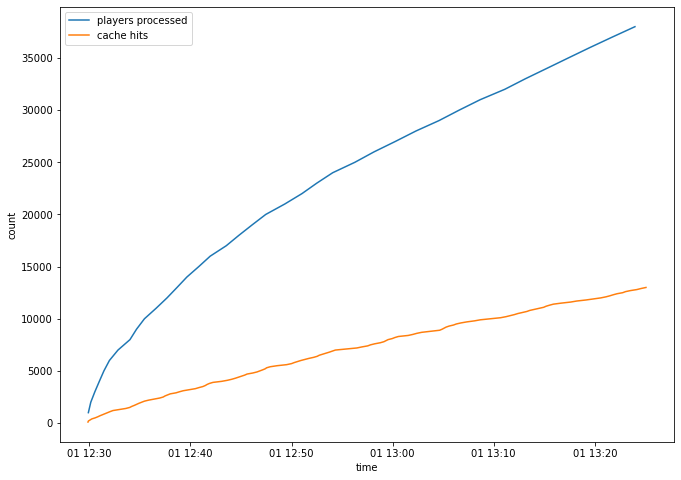

In [21]:
fig, ax = plt.subplots(figsize=(11, 8))
ax.plot(df_player["timestampDT"], df_player["count"], label="players processed")
ax.plot(df_cache["timestampDT"], df_cache["count"], label="cache hits")
ax.legend()
ax.set_ylabel("count")
ax.set_xlabel("time")

In [22]:
pred_x = np.arange(0, 200000, 500).reshape(-1, 1)
pred_y = player_regression.predict(pred_x)
pred_y = [pred_y[i][0] for i in range(len(pred_y))]
pred_y = pd.to_datetime(pred_y)

Text(0.5, 0, 'time')

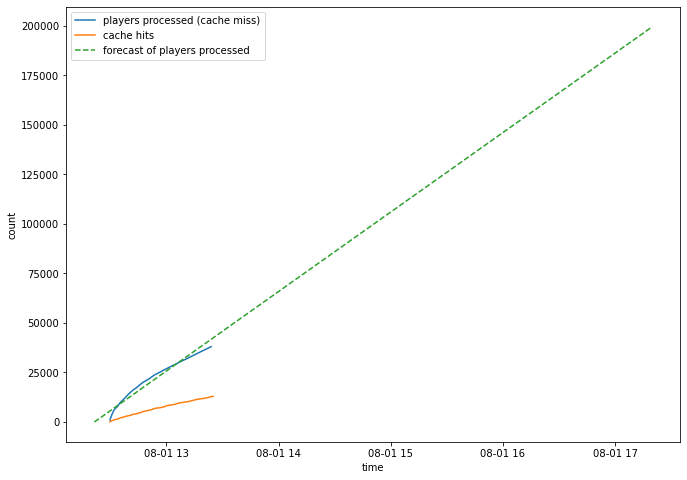

In [24]:
fig, ax = plt.subplots(figsize=(11, 8))
ax.plot(df_player["timestampDT"], df_player["count"], label="players processed (cache miss)")
ax.plot(df_cache["timestampDT"], df_cache["count"], label="cache hits")
ax.plot(pred_y, pred_x, label="forecast of players processed", linestyle="--")
ax.legend()
ax.set_ylabel("count")
ax.set_xlabel("time")